# Quantization Codebook of Vector Quantization

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* optimization of optimal codebooks using the Linde-Buzo-Gray algorithm

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import shutil

In [3]:
# parameters of the vector quantizer
L = 2
K = 256 # effective number of 4 bit/dimension

# set seed of random number generator
np.random.seed(24)

In [4]:
# generate training set 1
K_T = 100000
training_set_circGauss = np.random.randn(K_T, L)

training_set_corrGauss = np.random.multivariate_normal([0,0], [[1,0.9],[0.9,1]], K_T)

In [5]:
def quantize(codebook, x):
    # compute all pairs of distances
    distances = distance.cdist(x, codebook, 'euclidean')

    # find minimum distance
    i_opt = np.argmin(distances, axis=1)
    return i_opt
    
    
# can provide initial codebook, otherwise use random one    
def LindeBuzoGray_AlgorithmA(x,K, codebook = []):
    K_T = x.shape[0]
    L = x.shape[1]
    
    max_x = np.amax(x, axis=0)
       
    # random initial codebook
    if len(codebook) == 0:
        codebook = np.random.uniform(-max_x, max_x, (K,L))
    
    old_Dm = -1
    
    print('Generating codebook can take a while ... please wait')
    while True:
        # quantize
        iopt = quantize(codebook,x)
        xh = codebook[iopt]

        # compute average distortion
        Dm = np.mean(np.sum(np.square(x-xh),axis=1))

        if np.abs(Dm-old_Dm)/Dm < 1e-6:
            break
        old_Dm = Dm
        
        # generate new codebook by replacing entries with centroids
        for k in range(K):
            points = np.where(iopt == k)    
            if len(points[0]) > 0:
                codebook[k,:] = np.mean(x[points[0],:], axis=0)
            else:
                # if no point is assigned to the codebook entry, means it will never get changed, we replace it with a random entry
                codebook[k,:] = np.random.uniform(-max_x, max_x, (1,L))

                
    return codebook

In [6]:
codebook_circA = LindeBuzoGray_AlgorithmA(training_set_circGauss, K)
codebook_corrA = LindeBuzoGray_AlgorithmA(training_set_corrGauss, K)

Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait


In [7]:
print(codebook_circA.shape)

(256, 2)


In [8]:
def LindeBuzoGray_AlgorithmB(x,K):
    K_T = x.shape[0]
    L = x.shape[1]
    
    max_x = np.amax(x, axis=0)
    
    # initial codebook: mean of all training vectors
    kappa = 1
    codebook = np.array([np.mean(x, axis=0)])
    while kappa < K:
        # choose arbitrary difference vector
        Delta = np.random.uniform(-max_x/10, max_x/10, codebook.shape)
        codebook = np.concatenate((codebook-Delta, codebook+Delta),axis=0)
        
        newcodebook = LindeBuzoGray_AlgorithmA(x, codebook.shape[0], codebook)
        codebook = newcodebook.copy()
        
        kappa = 2*kappa
    
    return codebook

In [9]:
codebook_circB = LindeBuzoGray_AlgorithmB(training_set_circGauss, K)
codebook_corrB = LindeBuzoGray_AlgorithmB(training_set_corrGauss, K)

Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait
Generating codebook can take a while ... please wait


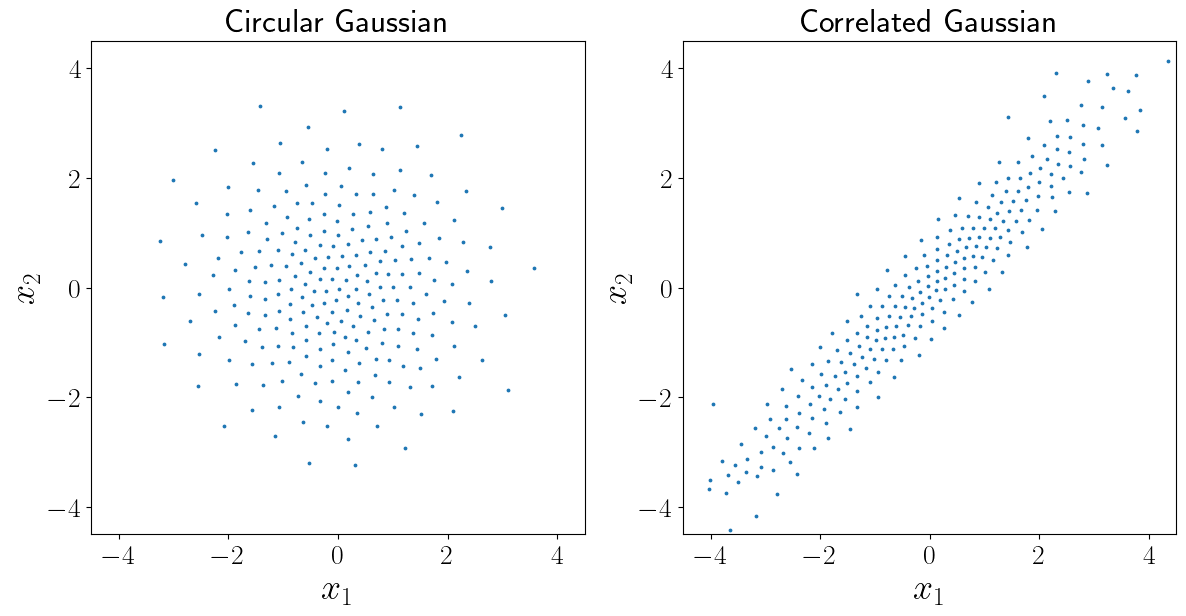

In [10]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plt.scatter(codebook_circB[:,0], codebook_circB[:,1], s=3)
plt.gca().set_aspect(aspect='equal')
plt.xlabel('$x_1$',fontsize=26)
plt.ylabel('$x_2$',fontsize=26)
plt.xlim((-4.5,4.5))
plt.ylim((-4.5,4.5))
plt.title('Circular Gaussian');


plt.subplot(1,2,2)
plt.scatter(codebook_corrA[:,0], codebook_corrA[:,1], s=3)
plt.gca().set_aspect(aspect='equal')
plt.xlabel('$x_1$',fontsize=26)
plt.ylabel('$x_2$',fontsize=26)
plt.xlim((-4.5,4.5))
plt.ylim((-4.5,4.5))
plt.title('Correlated Gaussian');

#plt.savefig('figure_DST_7.16.pdf',bbox_inches='tight')